In [0]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
tokenizer = Tokenizer()
# data = "April is the cruellest month, breeding \n  Lilacs out of the dead land, mixing \n Memory and desire, stirring \n Dull roots with spring rain. \n Winter kept us warm, covering \n Earth in forgetful snow, feeding \n A little life with dried tubers. \n Summer surprised us, coming over the Starnbergersee \n  With a shower of rain; we stopped in the colonnade, \n  And went on in sunlight, into the Hofgarten, \n And drank coffee, and talked for an hour. \n Bin gar keine Russin, stamm’ aus Litauen, echt deutsch. \n And when we were children, staying at the arch-duke’s, \n My cousin’s, he took me out on a sled, \n And I was frightened. He said, Marie, \n Marie, hold on tight. And down we went. \n In the mountains, there you feel free. \n I read, much of the night, and go south in the winter. \n What are the roots that clutch, what branches grow \n Out of this stony rubbish? Son of man, \n You cannot say, or guess, for you know only \n A heap of broken images, where the sun beats, \n And the dead tree gives no shelter, the cricket no relief, \n  And the dry stone no sound of water. Only \n  There is shadow under this red rock, \n (Come in under the shadow of this red rock), \n And I will show you something different from either \n Your shadow at morning striding behind you \n Or your shadow at evening rising to meet you; \n I will show you fear in a handful of dust. \n Frisch weht der Wind \n Der Heimat zu  \n Mein Irisch Kind, \n Wo weilest du? \n You gave me hyacinths first a year ago; \n They called me the hyacinth girl. \n —Yet when we came back, late, from the Hyacinth garden, \n Your arms full, and your hair wet, I could not \n Speak, and my eyes failed, I was neither \n Living nor dead, and I knew nothing, \n  Looking into the heart of light, the silence. \n Oed’ und leer das Meer. \n  Madame Sosostris, famous clairvoyante, \n Had a bad cold, nevertheless \n Is known to be the wisest woman in Europe, \n  With a wicked pack of cards. Here, said she, \n Is your card, the drowned Phoenician Sailor, \n (Those are pearls that were his eyes. Look!) \n Here is Belladonna, the Lady of the Rocks, \n The lady of situations. \n Here is the man with three staves, and here the Wheel, \n And here is the one-eyed merchant, and this card, \n Which is blank, is something he carries on his back, \n Which I am forbidden to see. I do not find \n The Hanged Man. Fear death by water. \n I see crowds of people, walking round in a ring. \n Thank you. If you see dear Mrs. Equitone, \n  Tell her I bring the horoscope myself: \n One must be so careful these days. \n Unreal City, \n Under the brown fog of a winter dawn, \n A crowd flowed over London Bridge, so many, \n I had not thought death had undone so many. \n Sighs, short and infrequent, were exhaled, \n And each man fixed his eyes before his feet. \n  Flowed up the hill and down King William Street, \n To where Saint Mary Woolnoth kept the hours \n With a dead sound on the final stroke of nine. \n There I saw one I knew, and stopped him, crying: Stetson! \n You who were with me in the ships at Mylae! \n That corpse you planted last year in your garden, \n Has it begun to sprout? Will it bloom this year? \n Or has the sudden frost disturbed its bed? \n Oh keep the Dog far hence, that’s friend to men, \n Or with his nails he’ll dig it up again! \n You! hypocrite lecteur!—mon semblable,—mon frère! \n"
data = open('irish-lyrics-eof.txt', 'r').read()

corpus = data.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(total_words)
print(tokenizer.word_index)

2690
{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 

In [4]:
import numpy as np

input_sequence = []

for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]       #  [82, 8, 1, 83, 84, 85]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequence.append(n_gram_sequence)                  # all input sequences

# pad sequence
max_lenth_sequence = max([len(x) for x in input_sequence])
input_sequence = np.array(pad_sequences(input_sequence, maxlen=max_lenth_sequence, padding='pre'))


# create predictor label
xs, labels = input_sequence[:, :-1], input_sequence[:, -1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

print("corpus: ", len(corpus))
print("input sequences: ", input_sequence.shape)
print("xs: ", xs.shape)
print("labels: ", labels.shape)
print("ys: ", ys.shape)       # 2-D array of one hot vectors of each word

corpus:  1693
input sequences:  (12038, 16)
xs:  (12038, 15)
labels:  (12038,)
ys:  (12038, 2690)


In [5]:
print(xs[10])

[  0   0   0   0   0   0   0   0   0   0   2  11  15  31 361]


In [6]:
print(ys[10])       # one hot vector of the next word

[0. 0. 0. ... 0. 0. 0.]


In [0]:
model = Sequential()
model.add(Embedding(total_words, 50, input_length=max_lenth_sequence-1))
model.add(Bidirectional(LSTM(80)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])
history = model.fit(xs, ys, epochs=100, verbose=1)

In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

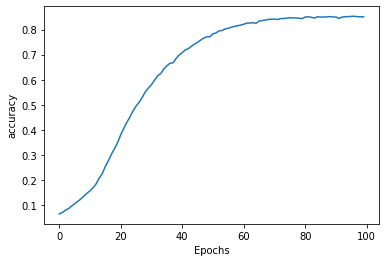

In [9]:
plot_graphs(history, 'accuracy')

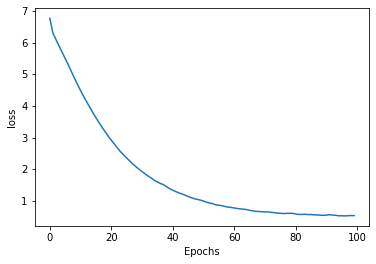

In [10]:
plot_graphs(history, 'loss')

In [12]:
seed_text = "Help me obi-van kanobi, I can't fly"
next_words = 100

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_lenth_sequence-1, padding='pre')
  predicted = model.predict_classes(token_list, verbose=0)
  output_word = ""

  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word

print(seed_text)

Help me obi-van kanobi, I can't fly is you well gone to their play my love my hair which he loves hair venture morn when we did seen easy to dublin call them now in me brother moon those tree used childer began to jumped went away shell life them in the army if oer the sea are torn away oer the seasons of conchology cannot hed there were there as now waken through rings immortal hadnt vigil slower walked lullaby lassies tis pate my fathers steal attend spire vow vow new died now crossed lassies khaki chanting lassies island lassies lassies paddys ball being compare through
